<a href="https://colab.research.google.com/github/abrazzaq02/Digital-Image-Processing/blob/main/Image_Restoration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

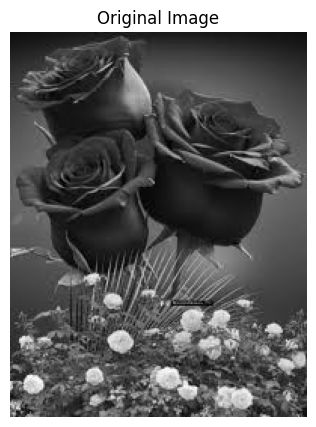

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Display using matplotlib
img=cv2.imread('Lubuu.jpg', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(5,5))
plt.imshow(img, cmap='gray')
plt.title('Origina Image')
plt.axis('off')
plt.show()

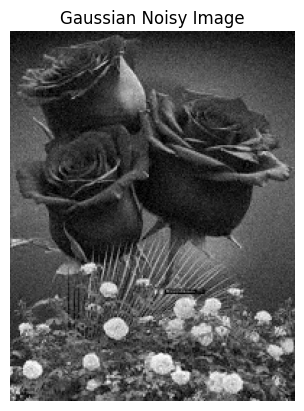

In [ ]:
row, col = img.shape
mean = 0
sigma = 8
gauss = np.random.normal(mean, sigma, (row, col))
noisy_gauss = img + gauss
noisy_gauss = np.clip(noisy_gauss, 0, 255).astype(np.uint8)

plt.imshow(noisy_gauss, cmap='gray')
plt.title('Gaussian Noisy Image')
plt.axis('off')
plt.show()


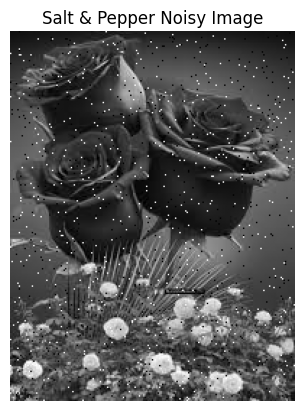

In [ ]:
noisy_sp = np.copy(img)
prob = 0.02  # 2% pixels affected
for i in range(row):
    for j in range(col):
        rnd = np.random.random()
        if rnd < prob/2:
            noisy_sp[i][j] = 0        # pepper
        elif rnd < prob:
            noisy_sp[i][j] = 255      # salt

plt.imshow(noisy_sp, cmap='gray')
plt.title('Salt & Pepper Noisy Image')
plt.axis('off')
plt.show()


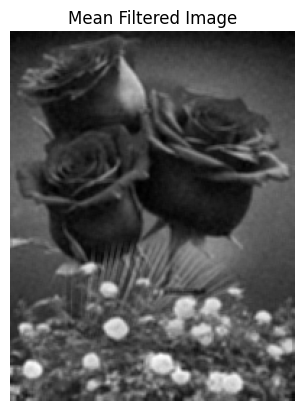

In [ ]:
mean_filtered = cv2.blur(noisy_gauss, (3,3))
plt.imshow(mean_filtered, cmap='gray')
plt.title('Mean Filtered Image')
plt.axis('off')
plt.show()


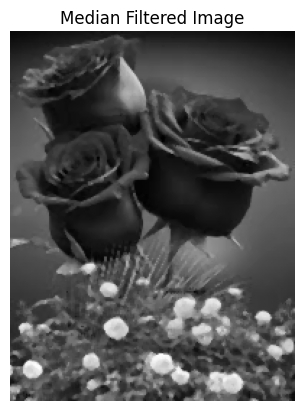

In [ ]:
median_filtered = cv2.medianBlur(noisy_sp, 3)
plt.imshow(median_filtered, cmap='gray')
plt.title('Median Filtered Image')
plt.axis('off')
plt.show()


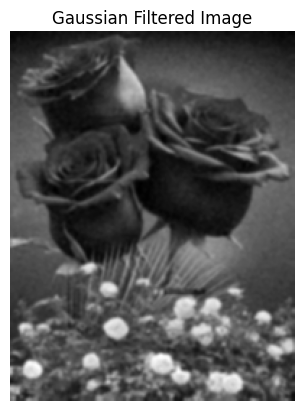

In [ ]:
gaussian_filtered = cv2.GaussianBlur(noisy_gauss, (5,5), 1)
plt.imshow(gaussian_filtered, cmap='gray')
plt.title('Gaussian Filtered Image')
plt.axis('off')
plt.show()


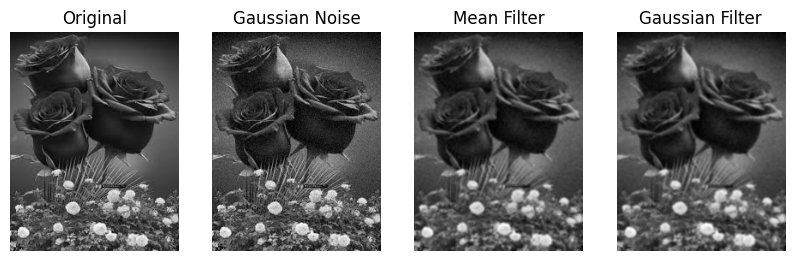

In [ ]:
titles = ['Original', 'Gaussian Noise', 'Mean Filter', 'Gaussian Filter']
images = [img, noisy_gauss, mean_filtered, gaussian_filtered]

plt.figure(figsize=(10,5))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()


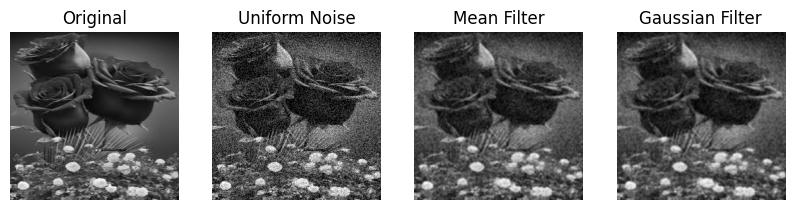

In [ ]:
#Task 01
import cv2, numpy as np, matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter, gaussian_filter

def add_uniform_noise(img):
    noise = np.random.uniform(-50, 50, img.shape)
    noisy = np.clip(img + noise, 0, 255)
    return noisy.astype(np.uint8)

for path in ['Lubuu.jpg', ]:
    img = cv2.imread(path, 0)
    img = cv2.resize(img, (256, 256))

    noisy = add_uniform_noise(img)
    mean_filtered = uniform_filter(noisy, 3)
    gaussian_filtered = gaussian_filter(noisy, 1)

    titles = ['Original', 'Uniform Noise', 'Mean Filter', 'Gaussian Filter']
    images = [img, noisy, mean_filtered, gaussian_filtered]

    plt.figure(figsize=(10, 5))
    for i in range(4):
        plt.subplot(1, 4, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.show()


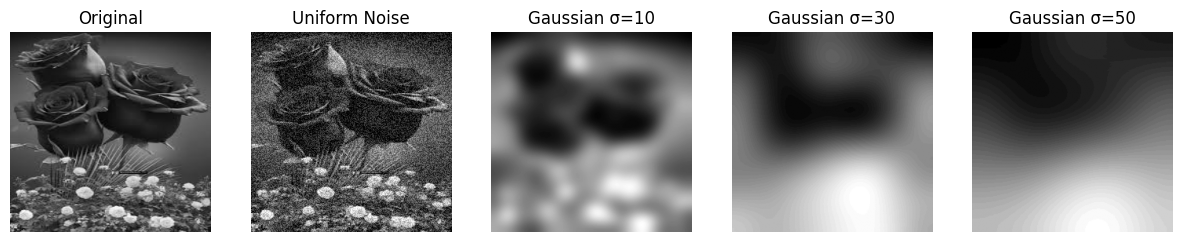

In [ ]:
#TAk 02
img = cv2.imread('Lubuu.jpg', 0) # Changed from 'image1.jpg'
img = cv2.resize(img, (256, 256))


noise = np.random.uniform(-50, 50, img.shape)
noisy = np.clip(img + noise, 0, 255).astype(np.uint8)

sigmas = [10, 30, 50]
gaussian_results = [gaussian_filter(noisy, sigma=s) for s in sigmas]

titles = ['Original', 'Uniform Noise'] + [f'Gaussian σ={s}' for s in sigmas]
images = [img, noisy] + gaussian_results

plt.figure(figsize=(15,5))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()

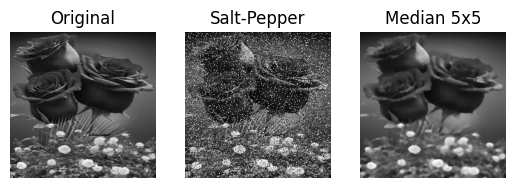

In [ ]:
#Task 03
img = cv2.imread('Lubuu.jpg', 0)
img = cv2.resize(img, (256, 256))


noisy = img.copy()
# Adding salt and pepper noise more efficiently
num_salt = 5000
num_pepper = 5000
row, col = img.shape
# Salt
coords = [np.random.randint(0, i - 1, num_salt) for i in img.shape]
noisy[coords[0], coords[1]] = 255
# Pepper
coords = [np.random.randint(0, i - 1, num_pepper) for i in img.shape]
noisy[coords[0], coords[1]] = 0

median = cv2.medianBlur(noisy, 5)

# Display images
plt.subplot(1,3,1); plt.imshow(img, cmap='gray'); plt.title('Original'); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(noisy, cmap='gray'); plt.title('Salt-Pepper'); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(median, cmap='gray'); plt.title('Median 5x5'); plt.axis('off')
plt.show()

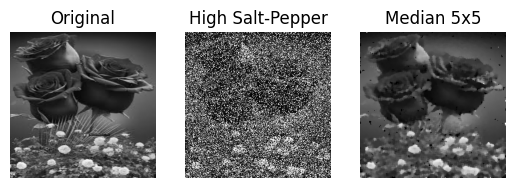

In [ ]:
#Task 04


# Load grayscale image
img = cv2.imread('Lubuu.jpg', 0)
img = cv2.resize(img, (256, 256))

# Increase probability by adding more noise points
num_noise = 20000  # higher than before
noisy = img.copy()
noisy[np.random.randint(0, 256, num_noise), np.random.randint(0, 256, num_noise)] = 255  # salt
noisy[np.random.randint(0, 256, num_noise), np.random.randint(0, 256, num_noise)] = 0    # pepper

# Apply median filter 5x5
median = cv2.medianBlur(noisy, 5)

# Display images
plt.subplot(1,3,1); plt.imshow(img, cmap='gray'); plt.title('Original'); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(noisy, cmap='gray'); plt.title('High Salt-Pepper'); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(median, cmap='gray'); plt.title('Median 5x5'); plt.axis('off')
plt.show()


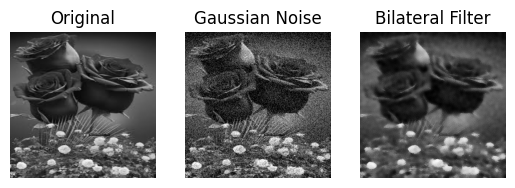

In [ ]:
#Task 05
# Load grayscale image
img = cv2.imread('Lubuu.jpg', 0)  # Changed from 'image1.jpg'
img = cv2.resize(img, (256, 256))

# Add Gaussian noise
noise = np.random.normal(0, 25, img.shape)  # mean=0, std=25
noisy = np.clip(img + noise, 0, 255).astype(np.uint8)

# Apply bilateral filter
bilateral = cv2.bilateralFilter(noisy, d=9, sigmaColor=75, sigmaSpace=75)

# Display images
plt.subplot(1,3,1); plt.imshow(img, cmap='gray'); plt.title('Original'); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(noisy, cmap='gray'); plt.title('Gaussian Noise'); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(bilateral, cmap='gray'); plt.title('Bilateral Filter'); plt.axis('off')
plt.show()

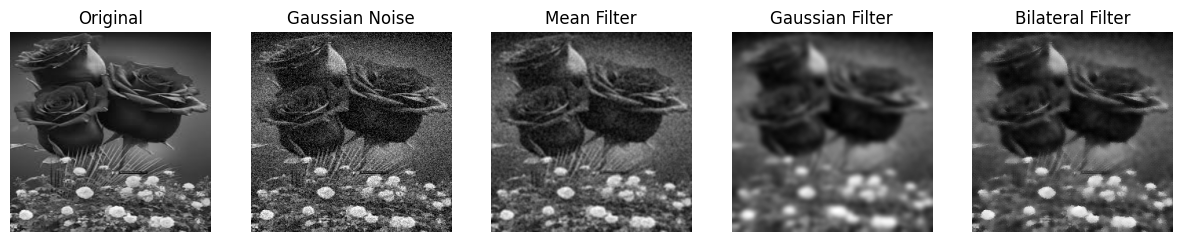

In [ ]:
#Task 06
img = cv2.imread('Lubuu.jpg', 0) # Changed from 'image1.jpg'
img = cv2.resize(img, (256, 256))

# Add Gaussian noise
noise = np.random.normal(0, 25, img.shape)
noisy = np.clip(img + noise, 0, 255).astype(np.uint8)

# Apply filters
mean_filtered = uniform_filter(noisy, size=3)
gaussian_filtered = gaussian_filter(noisy, sigma=3)
bilateral_filtered = cv2.bilateralFilter(noisy, d=9, sigmaColor=75, sigmaSpace=75)

# Titles and images
titles = ['Original', 'Gaussian Noise', 'Mean Filter', 'Gaussian Filter', 'Bilateral Filter']
images = [img, noisy, mean_filtered, gaussian_filtered, bilateral_filtered]

# Display all in one subplot
plt.figure(figsize=(15,5))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()